## Scaling 

- To avoid biasing the input variables we scale them to be in the same range of values 

## Scalers affected by outliers 

- Min-Max

- Standard

- MaxAbs

- Quantile Transformer gaussian

## Scalers robust to outliers 

- Robust Scaler 

- Quantile Transformer uniform 

- Normalizer 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
data = data[['Age', 'Fare', 'Survived']]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
data.describe()

,Age,Fare,Survived
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838
std,14.526497,49.693429,0.486592
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000


In [6]:
data.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']],
                                                    data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [9]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler() 
X_train_scaled = obj.fit_transform(X_train) 
X_test_scaled = obj.transform(X_test) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
X_train.describe()

,Age,Fare
count,712.000000,712.000000
mean,29.610730,33.260966
std,13.141031,51.818593
min,0.420000,0.000000
25%,22.000000,7.925000
50%,28.500000,14.500000
75%,36.000000,31.275000
max,80.000000,512.329200


In [15]:
X_train_scaled.describe()

,Age,Fare
count,7.120000e+02,7.120000e+02
mean,-1.055258e-16,-6.120260e-17
std,1.000703e+00,1.000703e+00
min,-2.222904e+00,-6.423244e-01
25%,-5.795649e-01,-4.892795e-01
50%,-8.458325e-02,-3.623054e-01
75%,4.865494e-01,-3.835230e-02
max,3.837194e+00,9.251602e+00


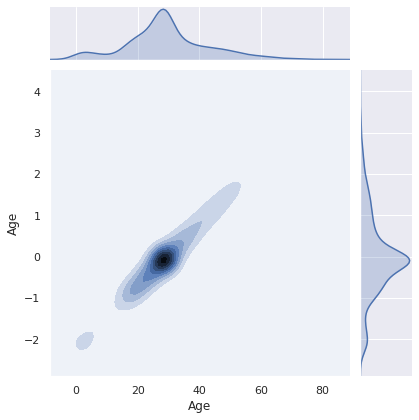

In [16]:
sns.set()
sns.jointplot(X_train['Age'],X_train_scaled['Age'], kind='kde')